<a href="https://colab.research.google.com/github/srinath68/NNDL/blob/main/Assignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **house_price_prediction**

**MINI BATCH GRADIENT DESCENT**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
data = pd.read_csv('kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503



# **Analysing the Data Set**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
data.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [6]:
# Null Value Treatment
data.isnull().sum().sum()

0


observation: Given Data set doesnot contain any null values

In [7]:
data_x = data['sqft_living']
data_y = data['price']

Text(0, 0.5, 'price of house')

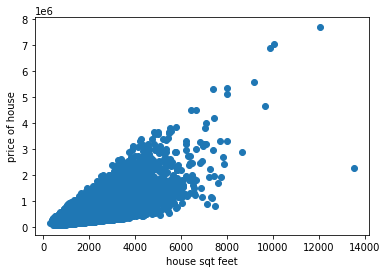

In [8]:
plt.scatter(data_x,data_y)
plt.xlabel("house sqt feet")
plt.ylabel("price of house")

# **Outliners Treatment**

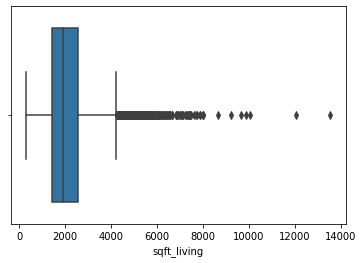

In [9]:
sns.boxplot(x=data['sqft_living'])

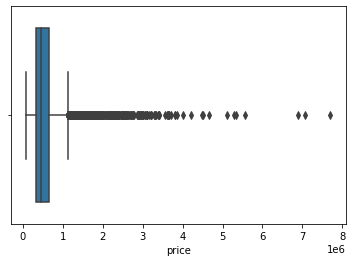

In [10]:
sns.boxplot(x=data['price'])

In [11]:
# we are having few outliners in the data set
# we need to remove them

# **Outliners Treatment: USING:**

1.Z-Score

2.IQR

In [12]:
from scipy import stats


data = data[['sqft_living','price']]
z = np.abs(stats.zscore(data))
filter = data[(z < 3).all(axis=1)]
filter

,sqft_living,price
0,1180,221900.0
1,2570,538000.0
2,770,180000.0
3,1960,604000.0
4,1680,510000.0
...,...,...
21608,1530,360000.0
21609,2310,400000.0
21610,1020,402101.0
21611,1600,400000.0


In [13]:
print(len(data))
len(filter)

21613


21088

After implementing zscore

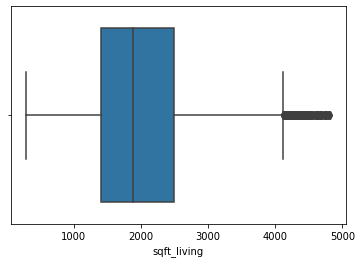

In [14]:
sns.boxplot(x=filter['sqft_living'])

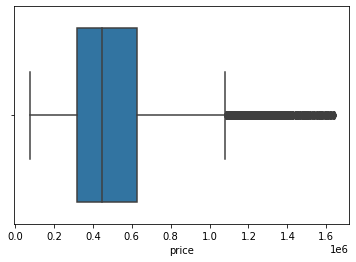

In [15]:
sns.boxplot(x=filter['price'])

In [16]:
len(filter)

21088

In [17]:
data

,sqft_living,price
0,1180,221900.0
1,2570,538000.0
2,770,180000.0
3,1960,604000.0
4,1680,510000.0
...,...,...
21608,1530,360000.0
21609,2310,400000.0
21610,1020,402101.0
21611,1600,400000.0


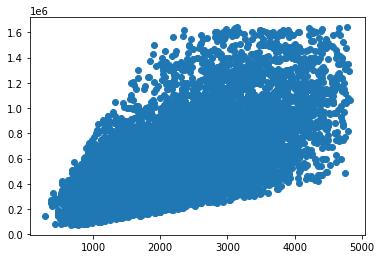

In [18]:
plt.scatter(filter['sqft_living'],filter['price'])

implementing IQR

In [19]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
iqr = q3 - q1
iqr

sqft_living      1123.0
price          323050.0
dtype: float64

In [20]:
print((data < (q1 - iqr*1.5)) | (data > (q3 + iqr*1.5)))

       sqft_living  price
0            False  False
1            False  False
2            False  False
3            False  False
4            False  False
...            ...    ...
21608        False  False
21609        False  False
21610        False  False
21611        False  False
21612        False  False

[21613 rows x 2 columns]


In [21]:
data.shape
# original dataset contains 21613 rows of data

(21613, 2)

In [22]:
data_cleared = data[~((data < (q1 - 1.5 * iqr)) |(data > (q3 + 1.5 * iqr))).any(axis=1)]
data_cleared.shape

(20292, 2)

after clearing data using IQR, it has 20292 rows

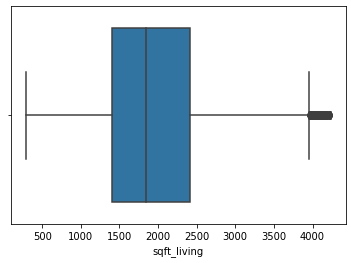

In [23]:
sns.boxplot(x=data_cleared['sqft_living'])

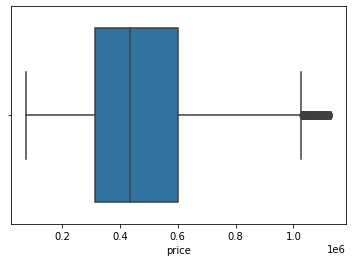

In [24]:
sns.boxplot(x=data_cleared['price'])

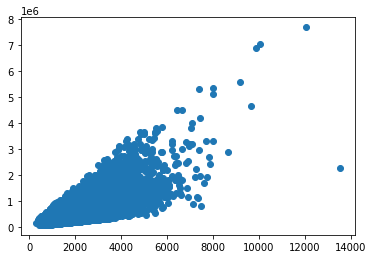

In [25]:
plt.scatter(data_x,data_y)

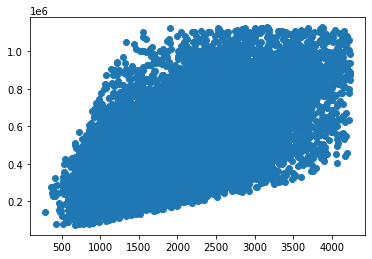

In [26]:
plt.scatter(data_cleared['sqft_living'],data_cleared['price'])

In [27]:
data_cleared.shape

(20292, 2)

In [28]:
# the plot has congested since the outliners are removed and x axis intervals are restricted to 4000 from 14000

In [29]:
data_x = data_cleared['sqft_living']
data_y = data_cleared['price']

# **Normalisation of data set**

In [30]:
data_x = (data_x - data_x.min())/(data_x.max() - data_x.min())
data_y = (data_y - data_y.min())/(data_y.max() - data_y.min())
data_x = np.array(data_x)
data_y = np.array(data_y)

In [31]:
data2 = data_cleared.copy()

In [32]:
data_new = []
for i in range(len(data_x)):
  data_new.append([data_x[i],data_y[i]])
data_new[:5]

[[0.22588832487309646, 0.1395724465558195],
 [0.5786802030456852, 0.4399049881235154],
 [0.1218274111675127, 0.0997624703087886],
 [0.42385786802030456, 0.5026128266033254],
 [0.35279187817258884, 0.41330166270783847]]

In [33]:
data_new = pd.DataFrame(data_new,columns=['sqft_living','price'])
data_new

,sqft_living,price
0,0.225888,0.139572
1,0.578680,0.439905
2,0.121827,0.099762
3,0.423858,0.502613
4,0.352792,0.413302
...,...,...
20287,0.314721,0.270784
20288,0.512690,0.308789
20289,0.185279,0.310785
20290,0.332487,0.308789


# **splitting data into training and testing data**

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
# splitting of data set into training and testing
data_train,data_test = train_test_split(data_new,test_size=0.1)

In [36]:
# INITIALISING BATCH SIZE AND CALCULATING NUMBER OF BATCHES
bs = 1000
nb = np.ceil(len(data_train)/bs)
nb

19.0

# **Training the Model**

In [37]:
# INITIALISING ALL REQUIRED PARAMETERS
iter = 1
# epochs = 10
epochs = 100
batch = nb - 1
bat = 1
alpha = 0.1 # LEARNING RATE
m = 1
c = -1
error = []

In [38]:
data_train

,sqft_living,price
6563,0.700508,0.600475
2298,0.164975,0.266033
13419,0.743655,0.748219
13363,0.314721,0.427553
13372,0.378173,0.536770
...,...,...
18732,0.362944,0.306888
14503,0.286802,0.328741
3177,0.662437,0.688789
13003,0.532995,0.536817


In [39]:
data_x = np.array(data_train['sqft_living'])
data_y = np.array(data_train['price'])
len(data_x)

18262

In [40]:
count = 0
while (iter<=epochs):
  i = 0
  # print("iter =",iter)
  bat = 1
  # RUNNING ITERATION FOR N-1 BATCHES
  while (bat <= batch):
    der_m = 0
    der_c = 0
    err = 0
    # print("bat = ",bat)
    for k in range(0,bs):
      der_m = der_m + (data_y[i] - (m*data_x[i])-c)*(data_x[i])
      der_c = der_c + (data_y[i] - (m*data_x[i])-c)
      i = i+1
      
    err = der_c**2
    err = (1/(2*bs))*err
    error.append(err)
    
    
    der_m = (-1/bs)*der_m
    der_c = (-1/bs)*der_c
    change_m = (-1)*alpha*der_m
    change_c = (-1)*alpha*der_c
    
    m = m + change_m
    c = c + change_c
    bat = bat + 1
     # print("new bat = ",bat,"\n")
    
 
  # EXECUTING FOR LAST BATCH
  der_m = 0
  der_c = 0
  err = 0
  count = count + 1
  # print("end")
  
  # FINDING REMAINING NUMBER OF BATCHES
  es = len(data_x) - i  
  
  for k in range(i,len(data_x)):
    der_m = der_m + (data_y[i] - (m*data_x[i])-c)*(data_x[i])
    der_c = der_c + (data_y[i] - (m*data_x[i])-c)
    i = i + 1
  
  err = der_c**2
  err = (1/(2*es))*err
  error.append(err)

  der_m = (-1/es)*der_m
  der_c = (-1/es)*der_c
  
  change_m = (-1)*alpha*der_m
  change_c = (-1)*alpha*der_c
  
  m = m + change_m
  c = c + change_c
  
  iter = iter + 1
  # print("new iter",iter,"\n")

print(m,c)

0.6401653796553796 0.10669468635101372


In [41]:
print(count)

100



# **MSE of training data**

In [42]:
# MEAN SQUARE ERROR IN EXPONENTIAL FORM
# MINIMISED ERROR
mse = 0
for i in range(0,len(data_train)):
  mse += (data_y[i] - (m*data_x[i]) -c)**2
mse = (1/len(data_train))*mse
mse

0.023737788633916627

In [43]:
data_test = np.array(data_test)
data_test_x = data_test[:,0]
print(data_test_x)
data_test_y = data_test[:,1]
data_test_y

[0.25634518 0.21319797 0.64213198 ... 0.45685279 0.26142132 0.46446701]


array([0.33444181, 0.12346793, 0.5719715 , ..., 0.25178147, 0.2456057 ,
       0.21377672])

In [44]:
len(data_test)

2030

In [45]:
# predicting results of test data set
pred = []
for i in range(len(data_test_x)):
  # print((m*data_test_x[i]) +c)
  pred.append((m*data_test_x[i]) +c)

# pred


# **MSE of testing data**

In [46]:
mse = 0
for i in range(0,len(data_test)):
  mse += (data_test[i][1] - (m*data_test[i][0]) - c)**2
mse = mse/len(data_test)
mse

0.02507127012195342

# **Visualising testing data results**

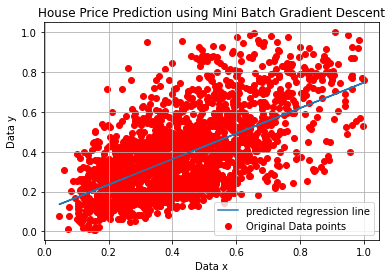

In [47]:
plt.scatter(data_test_x,data_test_y,label="Original Data points",color='red')
plt.plot(data_test_x,pred,label="predicted regression line")
plt.title("House Price Prediction using Mini Batch Gradient Descent")
plt.xlabel("Data x")
plt.ylabel("Data y")
plt.grid()
plt.legend()
plt.show()

In [48]:
data_train = pd.DataFrame(data_train)

data_train_pred = m*data_train['sqft_living'] + c
data_train_pred

6563     0.555135
2298     0.212306
13419    0.582757
13363    0.308168
13372    0.348788
           ...   
18732    0.339039
14503    0.290295
3177     0.530764
13003    0.447900
11462    0.317917
Name: sqft_living, Length: 18262, dtype: float64

# **Visualising results of Training data**

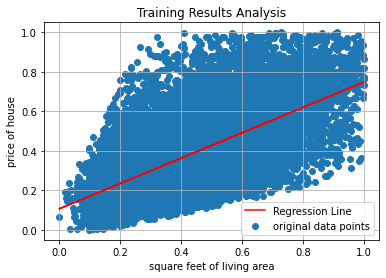

In [49]:
plt.plot(data_train['sqft_living'],data_train_pred,'red',label="Regression Line")
plt.scatter(data_train['sqft_living'],data_train['price'],label="original data points")
plt.xlabel("square feet of living area")
plt.ylabel("price of house")
plt.legend()
plt.grid()
plt.title("Training Results Analysis")
plt.show()
%matplotlib inline

# **ERROR RATE ANALYSIS**

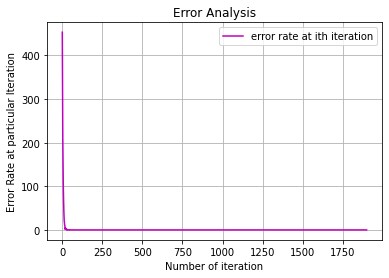

In [50]:
iters = np.arange(epochs*nb)
plt.plot(iters,error,color='m',label="error rate at ith iteration")
plt.legend()
plt.xlabel("Number of iteration")
plt.ylabel("Error Rate at particular Iteration")
plt.title("Error Analysis")
plt.grid()
plt.show()

In [51]:
len(error)

1900

In [52]:
# computig mean squared error
mse = 0
mse = (data_train['price'] - m*data_train['sqft_living'] - c)**2
mse.sum()/len(data_train)

0.023737788633916693

In [53]:
min_x = data2['sqft_living'].min()
max_x = data2['sqft_living'].max()
min_y = data2['price'].min()
max_y = data2['price'].max()
print(min_x,min_y,max_x,max_y)

290 75000.0 4230 1127500.0


# **Deployment of model**

In [54]:
input_x = float(input("enter square feet"))
input_x = (input_x - min_x)/(max_x - min_x)
output_y = m*input_x + c
output_y = (output_y)*(max_y - min_y) + min_y
output_y

enter square feet2650


590876.5600560149